In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Lasso, Ridge
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [4]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

## Fuel type column has a datatype object which needs to be converted to Int using get_dummies function in Pandas.

In [6]:
df = pd.get_dummies(data=df,columns= ['Fuel_Type'], dtype=int)

In [7]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


<Axes: >

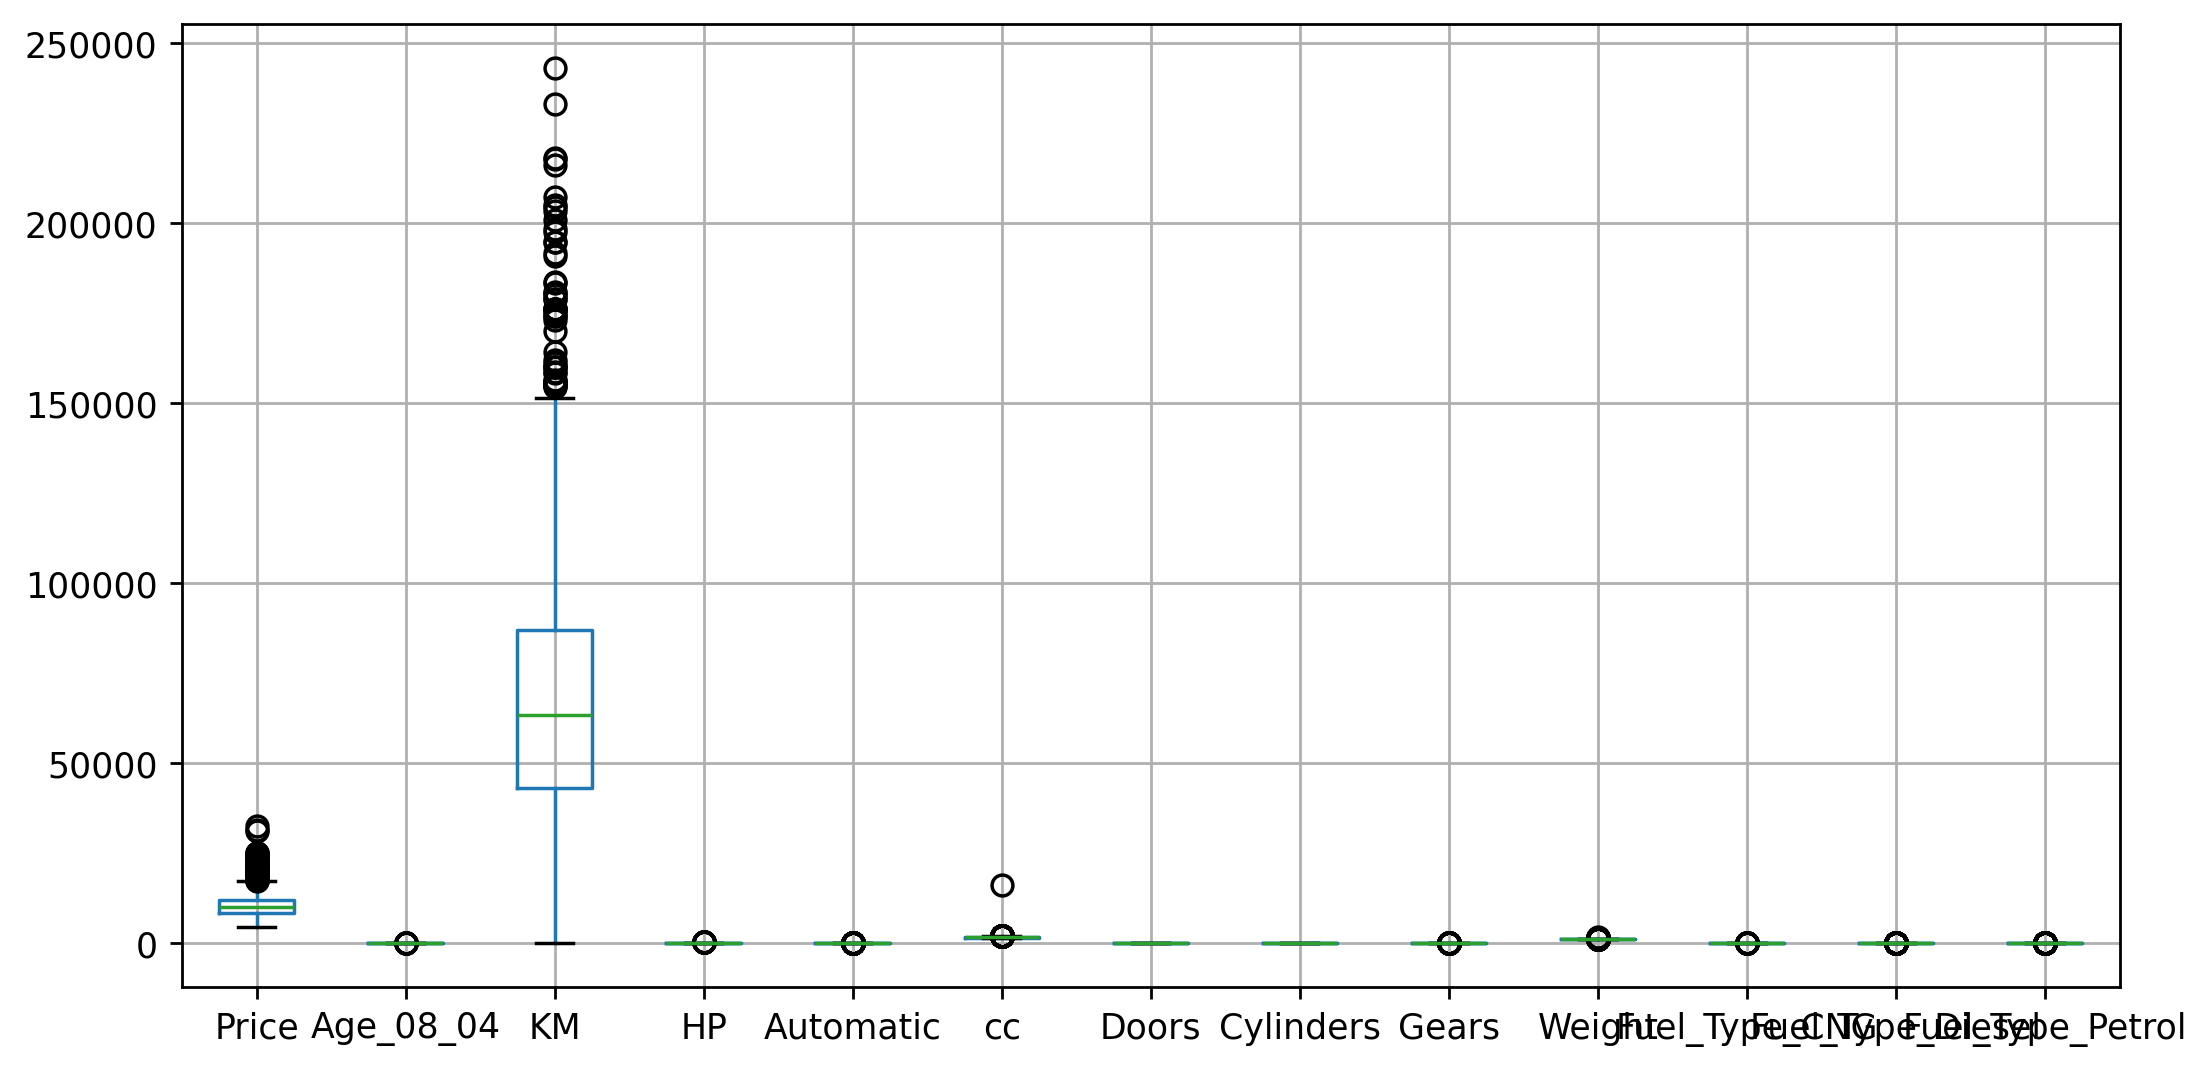

In [8]:
df.boxplot()

In [9]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198,-0.039536,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,0.002389,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,0.144016,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,0.062109,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,0.001486,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.005941,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,0.009680,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,-0.049537,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000,0.052756,0.568087,-0.560470


In [10]:
x=df.drop(columns=['Price'])
y=df['Price']

In [11]:
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
pd.DataFrame(sc.fit_transform(x), columns=x.columns)

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,-0.109454,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,-0.109454,-0.347849,0.368885
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885


In [15]:
import statsmodels.formula.api as smf

In [16]:
scaled_x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
scaled_x

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,-0.109454,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,-0.109454,-0.347849,0.368885
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885


In [17]:
scaled_x.drop(columns=['Cylinders'],inplace=True)
scaled_x

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.853577,-0.109454,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-0.901883,-0.109454,-0.347849,0.368885
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885


In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,test_size=0.2, random_state=1)

In [19]:
model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df).fit()

In [20]:
model.rsquared

0.8649083778053923

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
data = df.drop(columns=['Price','Cylinders'])

In [23]:
vif = pd.DataFrame()
vif

""


In [24]:
vif['Features'] = data.columns
vif

,Features
0,Age_08_04
1,KM
2,HP
3,Automatic
4,cc
5,Doors
6,Gears
7,Weight
8,Fuel_Type_CNG
9,Fuel_Type_Diesel


In [25]:
vif['VIF'] = [variance_inflation_factor(data,i) for i in range(len(data.columns))]

In [26]:
vif['VIF'] = [variance_inflation_factor(data,i) for i in range(len(data.columns))]

In [27]:
vif

,Features,VIF
0,Age_08_04,1.920520
1,KM,2.001790
2,HP,2.299766
3,Automatic,1.094550
4,cc,1.223892
5,Doors,1.217898
6,Gears,1.117413
7,Weight,3.297145
8,Fuel_Type_CNG,22.221198
9,Fuel_Type_Diesel,221.585039


## Lasso Method ##

In [29]:
l1 = Lasso()
l1.fit(xtrain,ytrain)
l1.score(xtrain,ytrain), l1.score(xtest,ytest)

(0.8640728253958722, 0.1630297698221972)

## Hyperparameter Tuning ##

In [31]:
for i in range(100,180):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    print(f"Alpha: {i} Train : {l1.score(xtrain,ytrain)} Test: {l1.score(xtest,ytest)}")

Alpha: 100 Train : 0.8550253665934633 Test: 0.87972186495084
Alpha: 101 Train : 0.8549623041802954 Test: 0.8796798849785623
Alpha: 102 Train : 0.8548986156065715 Test: 0.8796372832736684
Alpha: 103 Train : 0.8548342998974237 Test: 0.8795940618180451
Alpha: 104 Train : 0.8547693566814755 Test: 0.8795502213406448
Alpha: 105 Train : 0.8547040385391257 Test: 0.8795052960342898
Alpha: 106 Train : 0.8546378427333685 Test: 0.8794602206321521
Alpha: 107 Train : 0.854571019764079 Test: 0.8794145255935233
Alpha: 108 Train : 0.8545035692944356 Test: 0.8793682115413988
Alpha: 109 Train : 0.8544354913244385 Test: 0.8793212784757786
Alpha: 110 Train : 0.8543667858540877 Test: 0.8792737263966626
Alpha: 111 Train : 0.854297452883383 Test: 0.8792255553040509
Alpha: 112 Train : 0.8542274924123245 Test: 0.8791767651979435
Alpha: 113 Train : 0.8541569044409122 Test: 0.8791273560783405
Alpha: 114 Train : 0.8540856891246615 Test: 0.8790773276964072
Alpha: 115 Train : 0.8540138471331882 Test: 0.8790266790094

In [32]:
l1 = Lasso(alpha=155)
l1.fit(xtrain,ytrain)
l1.score(xtrain,ytrain), l1.score(xtest,ytest)

(0.8513426353662942, 0.8768605964837138)

## Ridge Method ##

In [34]:
l2 = Ridge()

l2.fit(xtrain,ytrain)
l2.score(xtrain,ytrain), l2.score(xtest,ytest)

(0.8640743471658469, 0.1596668930086188)

In [35]:
for i in range(70,200):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    print(f"Alpha: {i} Train: {l2.score(xtrain,ytrain)} Test: {l2.score(xtest,ytest)}")

Alpha: 70 Train: 0.8596516712895893 Test: 0.8384255020040472
Alpha: 71 Train: 0.8595908378494721 Test: 0.8393083411386943
Alpha: 72 Train: 0.8595298923383206 Test: 0.8401611503061387
Alpha: 73 Train: 0.8594688291347286 Test: 0.8409851745244015
Alpha: 74 Train: 0.8594076428799119 Test: 0.8417815941061731
Alpha: 75 Train: 0.8593463284664544 Test: 0.8425515286682712
Alpha: 76 Train: 0.8592848810275411 Test: 0.8432960408536836
Alpha: 77 Train: 0.8592232959266616 Test: 0.8440161397895258
Alpha: 78 Train: 0.8591615687477618 Test: 0.8447127843021367
Alpha: 79 Train: 0.859099695285829 Test: 0.8453868859086355
Alpha: 80 Train: 0.8590376715378908 Test: 0.8460393116025399
Alpha: 81 Train: 0.8589754936944097 Test: 0.8466708864495187
Alpha: 82 Train: 0.8589131581310591 Test: 0.8472823960079321
Alpha: 83 Train: 0.8588506614008606 Test: 0.8478745885875694
Alpha: 84 Train: 0.8587880002266711 Test: 0.8484481773588396
Alpha: 85 Train: 0.8587251714939989 Test: 0.8490038423236359
Alpha: 86 Train: 0.858662

In [36]:
l2 = Ridge(alpha=116)
l2.fit(xtrain,ytrain)
l2.score(xtrain,ytrain),l2.score(xtest,ytest)

(0.8566831056932221, 0.8599620025321004)

## Question 1 ##

In [37]:
""" Normalization and standardization are the processes wherein we perform scaling and mapping of the data to bring it to one range. Once it is brought to one range it is easier
for the machine to understand and evaluate. Normally a data has various attributes/columns which have different magnitude and the machine learning algorithm
tends to give more importance to those columns or features more importance where there are higher values which may affect the model's overall performance.
To avoid this we can use min-Max scaling,Z-score normalization(standardization) methods.
There are multiple benefits of Normalization or standardization.
1) It guarantees that every feature or column is given the actual and required importance.
2) It improves the speed and perfoemance of the model as all the datapoints are brought to one scale.
3)It improves the model's sensitivity towrads all the features in a data."""


" Normalization and standardization are the processes wherein we perform scaling and mapping of the data to bring it to one range. Once it is brought to one range it is easier\nfor the machine to understand and evaluate. Normally a data has various attributes/columns which have different magnitude and the machine learning algorithm\ntends to give more importance to those columns or features more importance where there are higher values which may affect the model's overall performance.\nTo avoid this we can use min-Max scaling,Z-score normalization(standardization) methods.\nThere are multiple benefits of Normalization or standardization.\n1) It guarantees that every feature or column is given the actual and required importance.\n2) It improves the speed and perfoemance of the model as all the datapoints are brought to one scale.\n3)It improves the model's sensitivity towrads all the features in a data."

## Question 2 ##

In [38]:
""" To address multicollinearity in multiple linear regression following methods can be used. 
1) Use the domain knowledge to select the most important columns/features and drop the columns which are not important.
2) VIF method to compare and see which columns have similar VIF value so that we can select some of them and drop the others.
3) We can drop the columns where the variance is 0.
4) PCA method."""

' To address multicollinearity in multiple linear regression following methods can be used. \n1) Use the domain knowledge to select the most important columns/features and drop the columns which are not important.\n2) VIF method to compare and see which columns have similar VIF value so that we can select some of them and drop the others.\n3) We can drop the columns where the variance is 0.\n4) PCA method.'